# 🧠 01 - Data Exploration

This notebook explores the **BRISC 2025** MRI dataset.  
Goals:
- Understand dataset structure and metadata  
- Visualize MRI slices and segmentation masks  
- Check label distribution and data balance  
- Verify train/test split integrity


#  Types of Brain Tumors

## 1. Glioma

**Origin:** Derived from *glial cells* (the supportive cells of the brain).  
**Location:** Found *within the brain tissue* or in the *brainstem*.  

**Subtypes:**
- Astrocytoma  
- Oligodendroglioma  
- Glioblastoma (highly aggressive type)

**MRI Characteristics:**
- Typically appears as a *diffuse mass* within brain parenchyma.  
- May show *edema* around the tumor.  
- Often has *ill-defined, infiltrative borders*.  
- Appears *hyperintense on T2/FLAIR* and *hypointense on T1* sequences.

🔹 **Diagnostic challenge:** Difficult to distinguish from normal tissue due to infiltrative nature.

---

## 2. Meningioma

**Origin:** Arises from the *meninges* — the membranes that cover the brain and spinal cord.  
**Location:** Occurs on the *surface of the brain*, close to the skull.  
**Nature:** Usually *benign* and *well-circumscribed*.

**MRI Characteristics:**
- *Well-defined mass* attached to the skull or dura.  
- Often exhibits the characteristic *“dural tail sign”*, indicating dural attachment.  
- Typically *iso- or hyperintense* on T1/T2 and shows *strong enhancement* after contrast administration.

🔹 **Clinical note:** Can compress adjacent brain tissue but rarely infiltrates it.

---

## 3. Pituitary Tumor

**Origin:** Arises from the *pituitary gland*, a small endocrine gland at the base of the brain (beneath the hypothalamus).  
**Location:** *Sella turcica* — the bony cavity that houses the pituitary gland.  
**Nature:** Most commonly a *benign adenoma* (pituitary adenoma).

**MRI Characteristics:**
- Small, well-defined tumor at the *central base of the brain*.  
- May cause *compression or deformation of the optic chiasm*.  
- Usually *hypointense on T1*, *hyperintense on T2*, and *enhances after contrast injection*.

🔹 **Clinical symptoms:** Hormonal imbalances (due to pituitary dysfunction), visual disturbances.

---

## 📊 Comparative Table

| **Feature** | **Glioma** | **Meningioma** | **Pituitary Tumor** |
|--------------|-------------|----------------|---------------------|
| **Origin** | Glial cells | Meninges (membranes) | Pituitary gland |
| **Location** | Within brain tissue | Surface of the brain, near skull | Base of the brain (sella turcica) |
| **Borders** | Usually ill-defined | Well-defined | Well-defined, small mass |
| **MRI (T1)** | Hypointense | Iso-/Hyperintense | Hypointense |
| **MRI (T2)** | Hyperintense | Hyperintense | Hyperintense |
| **Nature** | Often malignant or aggressive | Usually benign | Usually benign |
| **Position on MRI** | Diffuse, intra-axial | Peripheral, extra-axial | Central (pituitary region) |

---



In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm

DATA_DIR = "../datasets/raw/"
TRAIN_DIR = os.path.join(DATA_DIR, "classification_task/train")
TEST_DIR = os.path.join(DATA_DIR, "classification_task/test")

plt.style.use('ggplot')
sns.set_palette('muted')

import sys
sys.path.append('../')
from utils.dataset_loader import load_images_from_folder

In [3]:
for category in os.listdir(TRAIN_DIR):
    folder_path = os.path.join(TRAIN_DIR, category)
    n_images = len(os.listdir(folder_path))
    print(f"{category}: {n_images} images")


glioma: 1147 images
meningioma: 1329 images
no_tumor: 1067 images
pituitary: 1457 images


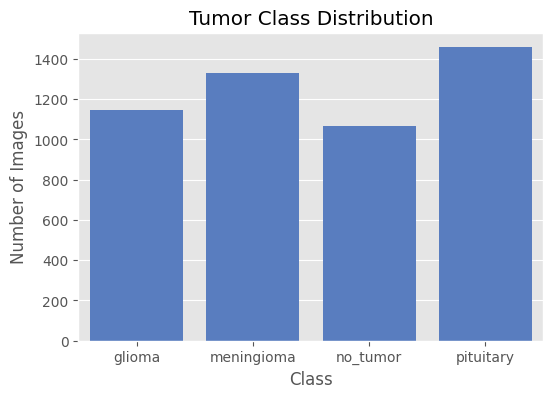

In [4]:
class_counts = {cls: len(os.listdir(os.path.join(TRAIN_DIR, cls))) 
                for cls in os.listdir(TRAIN_DIR)}

plt.figure(figsize=(6,4))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Tumor Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


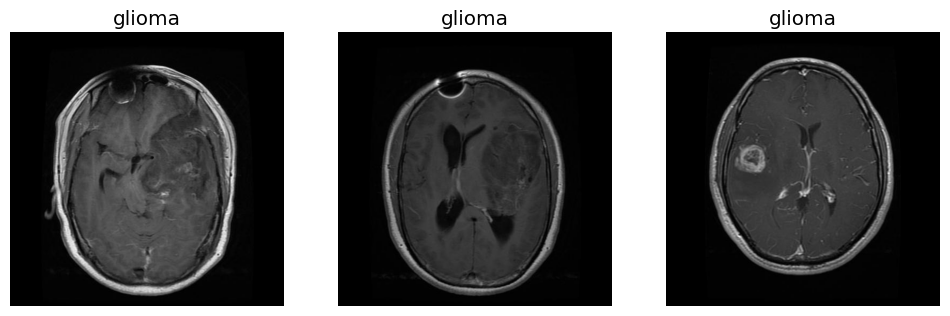

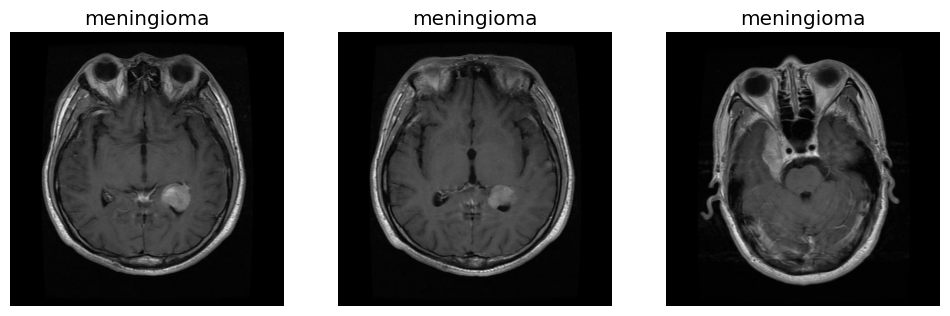

In [5]:
def show_samples(class_name, n=3):
    folder = os.path.join(TRAIN_DIR, class_name)
    imgs = os.listdir(folder)[:n]
    plt.figure(figsize=(12,4))
    for i, img_name in enumerate(imgs):
        img = cv2.imread(os.path.join(folder, img_name))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

show_samples("glioma")
show_samples("meningioma")


Shape: (512, 512)
Pixel range: 0 to 255


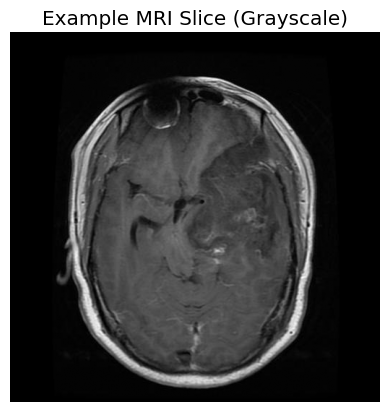

In [6]:
img_path = os.path.join(TRAIN_DIR, "glioma", os.listdir(os.path.join(TRAIN_DIR, "glioma"))[0])
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print("Shape:", img.shape)
print("Pixel range:", img.min(), "to", img.max())
plt.imshow(img, cmap='gray')
plt.title("Example MRI Slice (Grayscale)")
plt.axis('off')
plt.show()


Image exists: True
Mask exists: True


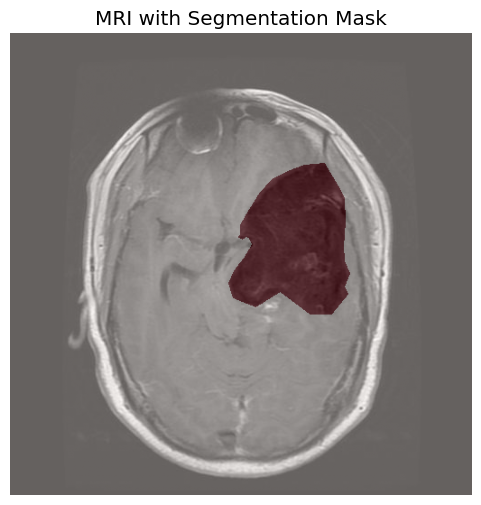

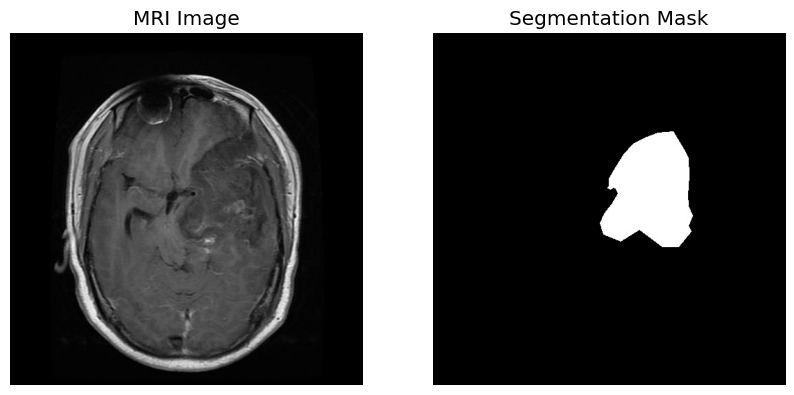

In [ ]:
import os
import matplotlib.pyplot as plt

def show_image_with_mask(image, mask, title="MRI with Mask"):
    if image is None or mask is None:
        print(" Either image or mask is None — check file paths.")
        return
    
    if image.dtype == 'object' or mask.dtype == 'object':
        print(" Invalid dtype (object). Ensure images are numeric arrays.")
        return

    plt.figure(figsize=(6,6))
    plt.imshow(image, cmap='gray')
    plt.imshow(mask, cmap='Reds', alpha=0.4)
    plt.title(title)
    plt.axis('off')
    plt.show()

img_path = "../datasets/raw/segmentation_task/train/images/brisc2025_train_00001_gl_ax_t1.jpg"
mask_path = "../datasets/raw/segmentation_task/train/masks/brisc2025_train_00001_gl_ax_t1.png"

print("Image exists:", os.path.exists(img_path))
print("Mask exists:", os.path.exists(mask_path))

from utils.visualization import show_image_with_mask
import cv2, os


image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

show_image_with_mask(image, mask, title="MRI with Segmentation Mask")

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("MRI Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(mask, cmap='gray')
plt.title("Segmentation Mask")
plt.axis('off')

plt.show()
